#  Plots of online constant dose policies

The constant dose policies show a maximum survival that trades off effectiveness and toxicity.  We run a second example with a discretized observables.  This will be used for RL modelling. 


8 Jun 2023

These results were generated by  `generate_primary_sim.py`

In [1]:
%reload_ext autoreload
%autoreload 2
import math, os, re, sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load continuous summaries
summary_const_policy = pd.read_csv('../output/summary_const_policy_158-14-32.csv')
summary_const_policy.head()

,patient_id,cohort,day_number,infection,severity,drug,cum_drug,efficacy,outcome,reward
0,0,0,11,74,123.132970,0.0,0.000000,-0.323788,die,-100
1,1,1,12,70,111.838638,0.1,0.098566,0.895519,die,-100
2,2,2,12,94,112.609774,0.2,0.197317,2.290724,die,-100
3,3,3,11,77,128.336149,0.3,0.293886,3.141807,die,-100
4,4,4,13,89,129.337846,0.4,0.396192,3.268798,die,-100


In [3]:
xavg = summary_const_policy.groupby('drug').mean()
xavg.sort_values('drug', inplace=True)
xavg.reset_index(inplace=True)
xavg

,drug,patient_id,cohort,day_number,infection,severity,cum_drug,efficacy,reward
0,0.0,1194.0,0.0,10.205,75.700,127.870868,0.000000,-0.041265,-100.0
1,0.1,1195.0,1.0,11.305,79.615,126.727331,0.098024,1.219260,-99.0
2,0.2,1196.0,2.0,12.310,84.425,126.432681,0.197118,2.332728,-92.0
3,0.3,1197.0,3.0,13.550,90.415,123.538495,0.297009,3.416491,-74.0
4,0.4,1198.0,4.0,14.845,96.570,116.697298,0.397366,4.219936,-30.0
...,...,...,...,...,...,...,...,...,...
7,0.7,1201.0,7.0,15.140,97.720,112.117122,0.695777,2.307602,-13.0
8,0.8,1202.0,8.0,14.495,95.220,119.141149,0.794386,1.199012,-43.0
9,0.9,1203.0,9.0,14.065,91.725,121.448967,0.892772,0.543583,-69.0
10,1.0,1204.0,10.0,13.850,92.160,126.243525,0.991354,0.225319,-75.0


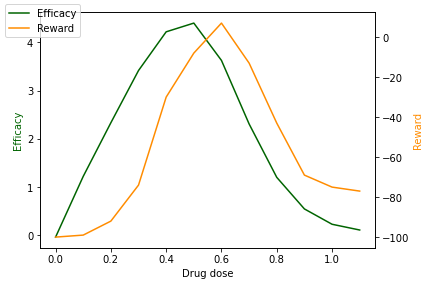

In [9]:
fig, ax1 = plt.subplots()

color = 'darkgreen'
ax1.set_xlabel('Drug dose')
ax1.set_ylabel('Efficacy', color=color)
ax1.plot(xavg['drug'], xavg['efficacy'], color = color, label='Efficacy')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkorange'
ax2.set_ylabel('Reward', color=color)  # we already handled the x-label with ax1
ax2.plot(xavg['drug'], xavg['reward'], color = color, label='Reward')
# legend1 = ax.legend(*sc.legend_elements(),
#                     loc="lower left", title="Daily Change")
# ax1.add_artist(legend1)
fig.legend(loc= 'upper left')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# plt.plot(xmin['drug'], xmin['reward'], color = 'blue')

In [35]:
# Load discrete summaries
summary_discrete_policy = pd.read_csv('../output/summary_discrete_const_158-20-05.csv')
summary_discrete_policy.head()
    

,patient_id,cohort,day_number,infection,severity,drug,cum_drug,efficacy,outcome,reward
0,0,0,8,68,120.0,0.0,0.000000,-0.012273,die,-100
1,1,1,10,79,120.0,0.1,0.097224,0.991309,die,-100
2,2,2,14,96,120.0,0.2,0.198722,2.395290,die,-100
3,3,3,19,104,100.0,0.3,0.299659,3.886682,recover,100
4,4,4,13,102,90.0,0.4,0.396191,4.176028,recover,100


In [39]:
xavg = summary_discrete_policy.groupby('drug').mean()
xavg.sort_values('drug', inplace=True)
xavg.reset_index(inplace=True)
display(xavg)

,drug,patient_id,cohort,day_number,infection,severity,cum_drug,efficacy,reward
0,0.0,1194.0,0.0,10.530,77.600,118.75,0.000000,-0.002769,-96.0
1,0.1,1195.0,1.0,12.155,82.700,117.90,0.098031,1.235998,-84.0
2,0.2,1196.0,2.0,13.280,89.825,114.40,0.197233,2.358528,-59.0
3,0.3,1197.0,3.0,14.815,96.515,105.10,0.297329,3.434713,-8.0
4,0.4,1198.0,4.0,15.455,99.475,92.80,0.397519,4.235631,33.0
...,...,...,...,...,...,...,...,...,...
7,0.7,1201.0,7.0,15.405,96.610,106.55,0.695786,2.322896,-21.0
8,0.8,1202.0,8.0,14.495,93.735,108.80,0.793295,1.221039,-37.0
9,0.9,1203.0,9.0,13.870,91.970,110.25,0.891234,0.469922,-40.0
10,1.0,1204.0,10.0,13.720,92.705,112.90,0.989250,0.254881,-53.0


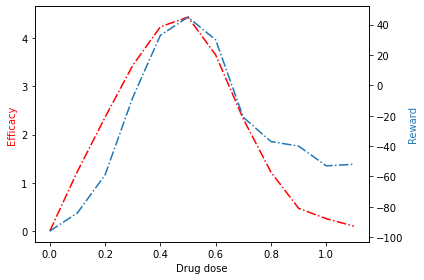

In [38]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Drug dose')
ax1.set_ylabel('Efficacy', color=color)
ax1.plot(xavg['drug'], xavg['efficacy'], '-.', color = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Reward', color=color)  # we already handled the x-label with ax1
ax2.plot(xavg['drug'], xavg['reward'], '-.', color = color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
